In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from data_structs import NewsDataLoader, EvaluationDataLoader, ScorePackage
from utils import model_predict, model_evaluate, model_predict_evaluate

#importing the data
news = pd.read_csv('./dataset_processed/fakeNews_titleStemming_Sampled.csv', index_col=0)
news.reset_index(inplace=True)

from sklearn.model_selection import train_test_split
train_news, test_news = train_test_split(news, test_size=0.2, 
                                         random_state=7)

train_news_predictors_rnn = train_news['title']
train_news_predictors = train_news.drop(columns = ['title', 'label'])
train_news_target = train_news['label']
train_news_loader = NewsDataLoader(train_news_predictors, train_news_target)
train_news_loader_rnn = NewsDataLoader(train_news_predictors_rnn, train_news_target)

test_news_predictors_rnn = test_news['title']
test_news_predictors = test_news.drop(columns = ['title', 'label'])
test_news_target = test_news['label']
test_news_loader = NewsDataLoader(test_news_predictors, test_news_target)
test_news_loader_rnn = NewsDataLoader(test_news_predictors_rnn, test_news_target)

In [2]:
train_score_packages = dict()
test_score_packages = dict()

# KNN

In [3]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=10, p=1, weights='distance').fit(
    train_news_loader.predictors, train_news_loader.target)

For <knn> evaluated on <train> Dataset:
    - accuracy: 1.0
    - precisionn: 1.0
    - recall: 1.0
    - f1 score: 1.0
For <knn> evaluated on <test> Dataset:
    - accuracy: 0.66
    - precisionn: 0.558
    - recall: 0.615
    - f1 score: 0.649


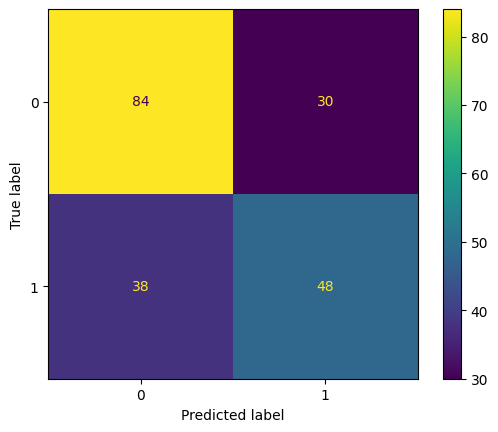

In [4]:
score_package_train_knn, score_package_test_knn = model_predict_evaluate(
        model=model_knn, 
        name_model='knn', 
        train_news_loader=train_news_loader,
        test_news_loader=test_news_loader
)
train_score_packages['knn'] = score_package_train_knn
test_score_packages['knn'] = score_package_test_knn

# Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression

model_logisticRegression = LogisticRegression(solver='liblinear', random_state=0)
model_logisticRegression.fit(
    train_news_loader.predictors, train_news_loader.target)

LogisticRegression(random_state=0, solver='liblinear')

For <logisticRegression> evaluated on <train> Dataset:
    - accuracy: 0.995
    - precisionn: 0.988
    - recall: 1.0
    - f1 score: 0.995
For <logisticRegression> evaluated on <test> Dataset:
    - accuracy: 0.905
    - precisionn: 0.965
    - recall: 0.838
    - f1 score: 0.904


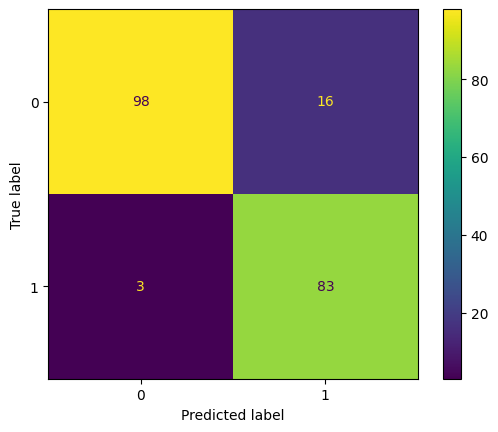

In [7]:
score_package_train_logisticRegression, score_package_test_logisticRegression = model_predict_evaluate(
        model=model_logisticRegression, 
        name_model='logisticRegression', 
        train_news_loader=train_news_loader,
        test_news_loader=test_news_loader
)
train_score_packages['logisticRegression'] = score_package_train_logisticRegression
test_score_packages['logisticRegression'] = score_package_test_logisticRegression

# Linear SVM

In [10]:
from sklearn import svm

model_svc = svm.SVC(C=0.1, kernel = "linear").fit(train_news_predictors, train_news_target).fit(
    train_news_loader.predictors, train_news_loader.target)

In [ ]:
score_package_train_linearSVN, score_package_test_linearSVN = model_predict_evaluate(
        model=model_svc, 
        name_model='linearSVM', 
        train_news_loader=train_news_loader,
        test_news_loader=test_news_loader
)
train_score_packages['linearSVM'] = score_package_train_linearSVN
test_score_packages['linearSVM'] = score_package_test_linearSVN

# Voting Classifier 

In [ ]:
# TODO: never import packages that will not be used

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
# TODO: try out different combinations of classifiers in the voting machine 

clf1 = LogisticRegression(max_iter=10000)
clf2 = svm.SVC(C= 1, kernel='linear')
clf3 = RandomForestClassifier()
# TODO: grid search on differt parameters to get the best metrics 
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('svm', clf2), ('rf', clf3)], voting='hard')
# TODO: calculate both train and test accuracies. 

In [ ]:
# TODO: Rewrite print statement with fstring 

eclf1 = eclf1.fit(news_predictors, news_target)
prediction = eclf1.predict(predictors_test)

accuracy = accuracy_score(target_test, prediction)
print("Αccuracy = ", accuracy * 100, "%")

f1 = f1_score(target_test, prediction, average='macro')
print("F1 score = ", f1 * 100, "%")

# Bagging Classifiers 

In [13]:
# TODO: missing

# RNN

In [6]:
import torch

In [7]:
words = [sentence.split(' ') for sentence in train_news_predictors_rnn.to_numpy()] + [sentence.split(' ') for sentence in test_news_predictors_rnn.to_numpy()]
words = np.array([word for sentence in words for word in sentence])
# hashing words for constant time searching
all_words_word2index = {word : index for index, word in enumerate(np.unique(words))}
n_words = len(all_words_word2index)

In [8]:
# Function to iterate through a sentence of text encode each 
#   letter as a 1 x n_words vector in an #words x 1 x n_words tensor
def sentence2tensor(sentence):
    sentence_parsed = sentence.split(' ')
    tensor = torch.zeros(len(sentence_parsed), 1, n_words)
    for index_word, word in enumerate(sentence_parsed):
        tensor[index_word][0][all_words_word2index[word]] = 1
    return tensor

In [9]:
from torch import nn
class news_cnn(nn.Module):
    ## Constructor commands
    def __init__(self, input_size, hidden_size, output_size):
        super(news_cnn, self).__init__()

        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
    
    ## Function to generate predictions
    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(hidden)
        output = self.softmax(output)
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)
    
## Function to randomly sample a single example
import random
def randomTrainingExample():
    ## Randomly choose a category index (1 and 0)
    category = random.randint(0, 1)
    
    ## Randomly choose a name in that category
    sentence = train_news_predictors_rnn[train_news_target == category].sample(
                                        n=1).to_numpy()[0]
    ## Convert the chosen example to a tensor
    category_tensor = torch.tensor([category], dtype=torch.long)
    sentence_tensor = sentence2tensor(sentence)
    
    return category, sentence, category_tensor, sentence_tensor

In [10]:
## Set learning rate
learning_rate = 0.005

## Define cost func
cost_fn = nn.CrossEntropyLoss()

## Training function for a single input (name category, name)
def train(model, category_tensor, sentence_tensor):
    
    ## initialize the hidden state
    hidden = model.initHidden()
    
    ## set the gradient to zero
    model.zero_grad()

    ## loop through the letters in the input, getting a prediction and new hidden state each time
    for i in range(sentence_tensor.size()[0]):
        output, hidden = model(sentence_tensor[i], hidden)

    ## Calculate cost and gradients
    cost = cost_fn(output, category_tensor)
    cost.backward()

    # Update parameters
    for p in model.parameters():
        p.data.add_(p.grad.data, alpha = -learning_rate) ## This adds the LR times the gradient to each parameter 

    ## Return the output and cost
    return output, cost.item()

In [11]:
## Initializations
n_iters = 1000
cost_every_n = 25
current_cost = 0
track_cost = []

news_rnn_inst = news_cnn(n_words, 6000, 2)

### Iteratively update model from randomly chosen example
for iter in range(1, n_iters + 1):
    if (iter % 20 == 0):
        print(f'{iter} iterations completed!')
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, cost = train(news_rnn_inst, category_tensor, line_tensor)
    current_cost += cost
    
    # Save cost every 25 iterations
    if iter % cost_every_n == 0:
        track_cost.append(current_cost/cost_every_n)
        current_cost = 0

20 iterations completed!
40 iterations completed!
60 iterations completed!
80 iterations completed!
100 iterations completed!
120 iterations completed!
140 iterations completed!
160 iterations completed!
180 iterations completed!
200 iterations completed!
220 iterations completed!
240 iterations completed!
260 iterations completed!
280 iterations completed!
300 iterations completed!
320 iterations completed!
340 iterations completed!
360 iterations completed!
380 iterations completed!
400 iterations completed!
420 iterations completed!
440 iterations completed!
460 iterations completed!
480 iterations completed!
500 iterations completed!
520 iterations completed!
540 iterations completed!
560 iterations completed!
580 iterations completed!
600 iterations completed!
620 iterations completed!
640 iterations completed!
660 iterations completed!
680 iterations completed!
700 iterations completed!
720 iterations completed!
740 iterations completed!
760 iterations completed!
780 iterations c

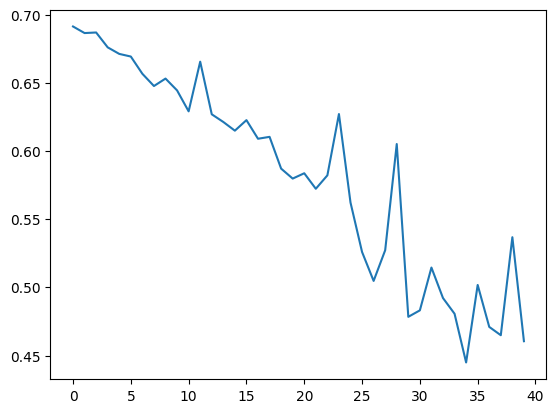

In [12]:
plt.plot(track_cost)
plt.show()

In [13]:
def predict(model, sentence):    
    ## Don't update gradient with any of these examples
    with torch.no_grad():
        ## Initialize new hidden state
        hidden = model.initHidden()
        
        ## Convert input str to tensor
        input_t = sentence2tensor(sentence)
 
        ## Pass each character into `rnn`
        for i in range(input_t.size()[0]):
            output, hidden = model(input_t[i], hidden)

        # Get top N categories from output
        _, topi = output.topk(1, 1, True)
        return topi[0][0].item()

In [14]:
# train_news_predictors, train_news_target
 
train_news_target_predicted = [predict(news_rnn_inst, sentence) 
                               for sentence in train_news_predictors_rnn]
test_news_target_predicted = [predict(news_rnn_inst, sentence) 
                               for sentence in test_news_predictors_rnn]

In [4]:
# Accuracy
from sklearn.metrics import accuracy_score
train_accuracy_rnn = accuracy_score(train_news_target, train_news_target_predicted)
test_accuracy_rnn = accuracy_score(test_news_target, test_news_target_predicted)
print(f'Train Accuracy for RNN model is {train_accuracy_rnn}')
print(f'Test Accuracy for RNN model is {test_accuracy_rnn}')

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(test_news_target, test_news_target_predicted)

# F1 Score
from sklearn.metrics import f1_score
train_f1_rnn = f1_score(train_news_target, 
                        train_news_target_predicted, average='macro')
test_f1_rnn = f1_score(test_news_target, 
                        test_news_target_predicted, average='macro')
print(f'Train F1 Score for RNN model is {train_f1_rnn}')
print(f'Test F1 Score for RNN model is {test_f1_rnn}')


NameError: name 'train_news_target_predicted' is not defined

In [16]:
# TODO: (optional) try different parameters for rnn
# TODO: train and test metrics 